# Predicting Used Automobile Market Prices With K-Nearest Machine Learning

We'll be working with a dataset that describes various automobiles in their technical aspects, insurance riskiness, and normalized loss (depreciation) per year. 

Our goal in this project will be to build a predictive model that can help guess the prices of automobiles given their individual features. 

We'll first organize the data before developing the model, adding multivariate feature analysis, and optimizing hyperparameters to find the best version of our model, and optimizing its effectiveness.

The dataset can be found at https://archive.ics.uci.edu/ml/datasets/automobile

Let's read in the dataset:

In [1]:
import pandas as pd 
cars = pd.read_csv('imports-85.data')
cars.head(2)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


Immediately we notice columns are missing names described in the documentation:

In [2]:
cols = ['symboling', 'normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
cars = pd.read_csv('imports-85.data', names = cols)
cars.head(2)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


From the documentation, we'll select only the columns with continuous values that we can use for analysis:

In [3]:
continuous_cols = ['normalized_losses','wheel_base','length','width','height','curb_weight','engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
cars = cars[continuous_cols]
cars.head(2)

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500


## Data Cleaning

We immediately see '?' values in normalizes_losses that will disrupt our model. We'll first replace these values with a numpy.nan null value.

In [4]:
import numpy as np
cars.replace(to_replace = '?', value = np.nan, inplace = True)
cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


Being that a string was in normalized_losses, it is a non-numeric column. We need to find the non-numeric columns and change them for analysis.

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    164 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-null object
peak_rpm             203 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [6]:
num_cols = ['bore','stroke','normalized_losses','horsepower','peak_rpm','price']
cars[num_cols] = cars[num_cols].apply(pd.to_numeric)
cars.info()
cars.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    164 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_size          205 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null float64
dtypes: float64(11), int64(4)
memory usage: 24.1 KB


,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


Let's examine how many rows are null for normalized_losses:

In [7]:
null_loss = cars[cars['normalized_losses'].isnull()]
null_loss.shape

(41, 15)

41 rows is almost 20% of our data - too many to get rid of them.

Let's replace those values with the column mean:

In [8]:
cars['normalized_losses'] = cars['normalized_losses'].fillna(cars['normalized_losses'].mean())
cars['normalized_losses'].isnull().sum()
cars.head(2)

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


In [9]:
cars.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

We still have a few null values in the data. 

Since we want to predict price, let's remove the rows that have a null price value. 

In [10]:
cars = cars[~cars['price'].isnull()]

Finally we'll replace the othe missing values with the means of their columns.

In [11]:
cars = cars.fillna(cars.mean())
cars.isnull().sum() # confirm no more null values

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Finally, we'll normalize all of our numeric values so they range from zero to one - accomplished by subtracting the minimum values and dividing by the result of maximum minus minimum.

We'll preserve the price column since it's the value we're trying to predict.

In [12]:
normalized_cars = (cars - cars.min())/(cars.max()-cars.min())
normalized_cars.drop('price', axis = 1)
normalized_cars['price'] = cars['price']
normalized_cars

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.125000,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.187500,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.062500,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.264151,0.421429,0.633333,0.081250,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.177358,0.685714,0.347619,0.112500,0.247664,0.673469,0.277778,0.342105,16430.0


## Univariate K-Nearest Neighbors Models

We'll start with a simple model. 

Define a train - test function:

In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def knn_train(train_col, target_col, df, k):
    np.random.seed(1) #initialize random seed
    
    shuffled_index = np.random.permutation(df.index)
    df_shuf = df.reindex(shuffled_index) # shuffle dataframe
    
    border = int(len(df)*.5) #to split into train/test
    
    train_df, test_df = df_shuf.iloc[:border], df_shuf.iloc[border:] # split df
    
    knn = KNeighborsRegressor(n_neighbors = k, algorithm = 'brute') # initialize model
    
    knn.fit(train_df[[train_col]],train_df[target_col]) # fit model
    
    predictions = knn.predict(test_df[[train_col]]) #predict
    
    rmse = (mean_squared_error(test_df[target_col],predictions)**.5) # check error rmse
    return rmse

Let's try our function with different numeric columns to try and predict price:

In [60]:
rmses = {}
train_cols = list(normalized_cars.columns)
train_cols.remove('price')
for name in train_cols:
    rmses[name] = knn_train(name, 'price',normalized_cars, k = 5)
sorted(rmses.items(), key=lambda x:x[1], reverse=False)

[('engine_size', 3216.8365762064755),
 ('horsepower', 4032.3848018386107),
 ('curb_weight', 4400.6231752215535),
 ('width', 4650.528354098837),
 ('city_mpg', 4830.9190611975255),
 ('highway_mpg', 4894.959094844207),
 ('length', 5422.194353938375),
 ('wheel_base', 5510.4244296830275),
 ('compression_ratio', 6840.976895643827),
 ('bore', 6992.745783685227),
 ('peak_rpm', 7295.489961871127),
 ('normalized_losses', 7581.611022979375),
 ('height', 7764.001175417297),
 ('stroke', 8289.58156846279)]

We see our lowest rmse is predicting price through engine size when running the Univariate model with default k values. 

Let's try a few different k values to see if they effect our rmses:

In [71]:
rmse_ks = {}
for name in train_cols:  
    results = {}
    for n in range(1,10,2):
        results[n] = knn_train(name, 'price',normalized_cars, k = n)
    rmse_ks[name] = results
rmse_ks    


{'bore': {1: 7554.9512176446315,
  3: 6870.122285026746,
  5: 6992.745783685227,
  7: 6846.130978887037,
  9: 6932.63573820032},
 'city_mpg': {1: 4999.6926667922535,
  3: 4665.399526693761,
  5: 4830.9190611975255,
  7: 5156.33162181214,
  9: 5324.822735078125},
 'compression_ratio': {1: 7917.579731956047,
  3: 6319.886594524997,
  5: 6840.976895643827,
  7: 6614.376984425625,
  9: 6747.419859657354},
 'curb_weight': {1: 5496.150727716825,
  3: 5055.228940548997,
  5: 4400.6231752215535,
  7: 4367.669511999935,
  9: 4634.055301484907},
 'engine_size': {1: 3475.2810813025476,
  3: 2790.45642413665,
  5: 3216.8365762064755,
  7: 3631.9860373729207,
  9: 3782.8088507736234},
 'height': {1: 8931.134984917195,
  3: 8025.141653986966,
  5: 7764.001175417297,
  7: 7613.249014705291,
  9: 7664.919593082149},
 'highway_mpg': {1: 6308.517418522515,
  3: 4686.072257255539,
  5: 4894.959094844207,
  7: 5144.27150086394,
  9: 5274.5968079437935},
 'horsepower': {1: 3625.4304121396854,
  3: 4028.605

Let's plot the results:

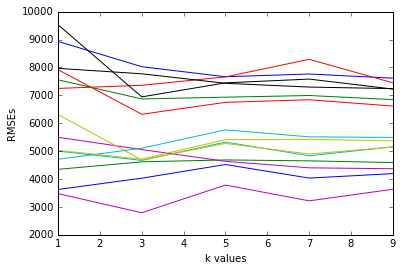

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [n for n in range(1,11,2)]
for k,v in rmse_ks.items():
    y = list(v.values())
    plt.plot(x,y)
    plt.xlabel('k values')
    plt.ylabel('RMSEs')


We see that a very low rmse (less than 3000) is achieved at k=3. 

Examining the data above, it's the rmse for engine_size at k=3, equalling 2790.46.

## Multivariate K-Nearest Neighbors Models

We'll now modify our function above to work with multiple columns (and default k value) in hopes of reducing our RMSE. 

In [80]:
def knn_train(col_list, target_col, df):
    np.random.seed(1) #initialize random seed
    
    shuffled_index = np.random.permutation(df.index)
    df_shuf = df.reindex(shuffled_index) # shuffle dataframe
    
    border = int(len(df)*.5) #to split into train/test
    
    train_df, test_df = df_shuf.iloc[:border], df_shuf.iloc[border:] # split df
    
    knn = KNeighborsRegressor(algorithm = 'brute') # initialize model
    
    knn.fit(train_df[col_list],train_df[target_col]) # fit model
    
    predictions = knn.predict(test_df[col_list]) #predict
    
    rmse = (mean_squared_error(test_df[target_col],predictions)**.5) # check error rmse
    return rmse



We'll use 2-5 best features from our univariate model that was tested with the default k value of 5. For convenience, the ordered list is copied below:

In [84]:
best_features = ['engine_size','horsepower','curb_weight','width','city_mpg','highway_mpg','length','wheel_base','compression_ratio','bore','peak_rpm','normalized_losses','height','stroke']
multi_rmses = []
for n in range(1,6):
    features = best_features[:n]
    multi_rmses.append(knn_train(features,'price',normalized_cars))
multi_rmses

[3216.8365762064755,
 2950.255443479798,
 3423.7806300019042,
 3487.340917327035,
 3360.832156381264]

We see the lowest RMSE is achieved when using our three best individual features - engine_size, horsepower, and curb_weight.

Curb weight is the total weight of a vehicle including all factory-installed equipment, all essential consumables for operation like coolant oil, motor oil, air conditioning refrigerant, transmission oil, a 90% full fuel tank and not including any passengers or cargo.

Now we'll optimize our model by tweaking the k value, using the top 3 performing models from our initial multivariate model (2,3, and 5 best features):

In [85]:
def knn_train(col_list, target_col, df, k):
    np.random.seed(1) #initialize random seed
    
    shuffled_index = np.random.permutation(df.index)
    df_shuf = df.reindex(shuffled_index) # shuffle dataframe
    
    border = int(len(df)*.5) #to split into train/test
    
    train_df, test_df = df_shuf.iloc[:border], df_shuf.iloc[border:] # split df
    
    knn = KNeighborsRegressor(n_neighbors = k, algorithm = 'brute') # initialize model
    
    knn.fit(train_df[col_list],train_df[target_col]) # fit model
    
    predictions = knn.predict(test_df[col_list]) #predict
    
    rmse = (mean_squared_error(test_df[target_col],predictions)**.5) # check error rmse
    return rmse


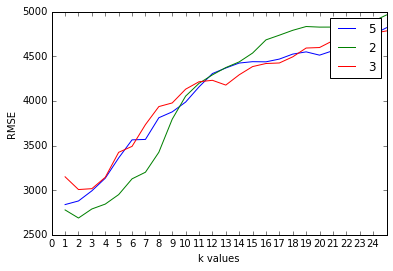

In [133]:
rmse_hps = {}
for i in [2,3,5]:
    rmse_bf = []
    for n in range(1,26):
        result = knn_train(best_features[:i],'price',normalized_cars,n)
        rmse_bf.append(result)
    rmse_hps[str(i)] = rmse_bf
rmse_hps
for k in rmse_hps:
    x = range(1,26)
    y = rmse_hps[k]
    plt.plot(x,y, label = k)
plt.legend()
plt.xlabel('k values')
plt.ylabel('RMSE')
plt.xticks(range(25))
plt.show()

The graph shows us the following:
    For 3 best features (our top multivariate model), our preferred k-value is 2.
    For 2 best features (2nd place model), our preferred k-value is 2, and it also is our best-performing model.
    For 5 best features (3rd place), our preferred k-value is 1.
    
    For all the models, the top k values are 1-2. This could be because of the many different models of automobile in our dataset, meaning that there are not too many similarly-features cars. 
    
    Given that our set only contains appx 205 cars from different companies, it makes sense that there would not be too many similar rows, even when isolating for just a few best features. 

In [135]:
result = knn_train(best_features[:2],'price',normalized_cars,2)
result

2687.9334815039783

Our top-performing model (2 best features, k=3) yields an RMSE of 2687.93 dollars - considering that the prices in our set range from 5,118 to 45,400, our predictive model could be of some help for predicting prices when it comes to higher-end automobile brands or models. However, it would not be much help for any run-down or discount models of car.